In [1]:
import numpy as np
from gnss_func.model import single_polarization
from gnss_func.utils import lin2dBm
import tensorly as tl
import matplotlib.pyplot as plt
from bayopt.gaussian import MM_BSL
from gnss_func.array import array_lin

Using numpy backend.


In [2]:
nAntennas = 8
B = 1023e6
Tc = 1/B
T  = 1e-3
IDsat = 20

factor = 0.8
tau_los = 0.5*Tc
tau_vec = np.array([tau_los,tau_los + factor*Tc])
theta_deg_vec = np.array([44.5,55])
number_of_epochs = 30
delayGranularity = 11

In [3]:
print(tau_vec)

[4.88758553e-10 1.27077224e-09]


In [4]:
gnss_model = single_polarization(nAntennas, B, T, Tc,delayGranularity, tau_vec, theta_deg_vec, number_of_epochs, IDsat,'Qw')


In [5]:
gnss_model.rx_signal(40)

In [6]:
from gnss_func.estimators import singlePolModel_estimator

In [7]:
theta_deg_space = np.linspace(35,75,200)

In [8]:
estimator_model = singlePolModel_estimator(gnss_model,delayGranularity,theta_deg_space)

In [9]:
print(tau_vec )

[4.88758553e-10 1.27077224e-09]


In [25]:
print(estimator_model.rmse(tau_los))
print(estimator_model.tau_los_est)
print(estimator_model.tau_est)

0.11988501386296992
8.886519150448771e-10
[8.88651915e-10 4.44325958e-10 7.99786724e-10 2.66595575e-10
 7.10921532e-10 6.22056341e-10 0.00000000e+00]


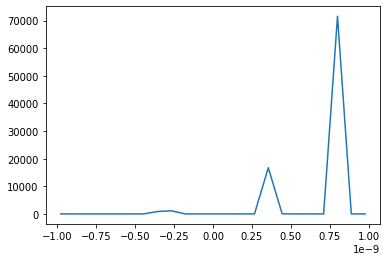

In [26]:
estimator_model.plot_beta_tau()

In [27]:
print(estimator_model.rmse_angle(tau_los))
print(estimator_model.tau_los_est)
print(estimator_model.tau_est)

0.11988501386296992
8.886519150448771e-10
[8.88651915e-10 6.22056341e-10 7.99786724e-10 6.22056341e-10
 0.00000000e+00]


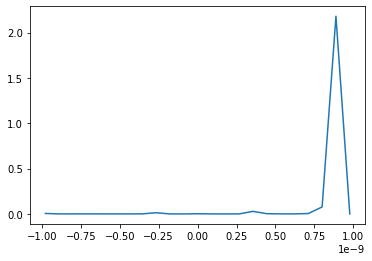

In [28]:
estimator_model.plot_beta_tau()


In [13]:
print(estimator_model.tau_los_est)
print(tau_los)


7.109215320359016e-10
4.887585532746823e-10


In [14]:
print(estimator_model.tau_space)

[-9.77517107e-10 -8.88651915e-10 -7.99786724e-10 -7.10921532e-10
 -6.22056341e-10 -5.33191149e-10 -4.44325958e-10 -3.55460766e-10
 -2.66595575e-10 -1.77730383e-10 -8.88651915e-11  0.00000000e+00
  8.88651915e-11  1.77730383e-10  2.66595575e-10  3.55460766e-10
  4.44325958e-10  5.33191149e-10  6.22056341e-10  7.10921532e-10
  7.99786724e-10  8.88651915e-10  9.77517107e-10]


In [15]:
print(gnss_model.tx_power)
print(10*np.log10(B*T))


1.8056464331332742
60.0987563371216


In [16]:
Y = tl.unfold(gnss_model.rSignal, mode=2)
R = Y @ np.conj(Y).T

In [17]:
L,U= np.linalg.eig(R)

In [18]:
Ru= U[:,2::] @ np.conj(U[:,2::]).T
S = 1/(np.diag(np.conj(estimator_model.angle_basis).T @  Ru @ estimator_model.angle_basis))

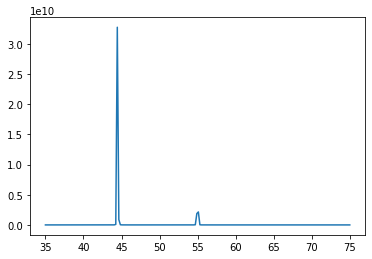

In [19]:
plt.plot(theta_deg_space,np.abs(S)**2)



In [20]:
print(estimator_model.theta_estimation())



[44.44723618 55.10050251]
